In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
dat_movies = pd.read_csv("../data/ml-1m/movies.dat",sep='::',encoding='latin-1',header=None,names=["MovieID","Title","Genres"])
dat_ratings = pd.read_csv("../data/ml-1m/ratings.dat",sep='::',encoding='latin-1',header=None,names=['UserID',"MovieID","Rating","Timestamp"])
dat_users = pd.read_csv("../data/ml-1m/users.dat",sep='::',encoding='latin-1',header=None,names=["UserID","Gender","Age","Occupation","Zip Code"])

C:\Users\harsh\AppData\Local\Temp\ipykernel_10588\284825200.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dat_movies = pd.read_csv("../data/ml-1m/movies.dat",sep='::',encoding='latin-1',header=None,names=["MovieID","Title","Genres"])
C:\Users\harsh\AppData\Local\Temp\ipykernel_10588\284825200.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dat_ratings = pd.read_csv("../data/ml-1m/ratings.dat",sep='::',encoding='latin-1',header=None,names=['UserID',"MovieID","Rating","Timestamp"])
C:\Users\harsh\AppData\Local\Temp\ipykernel_10588\284825200.py:3: ParserWarning: Falling back to the 'python' engin

In [ ]:
print(dat_ratings)
#converting time from epoch/unix to standard datetime format
dat_ratings['Timestamp'] = pd.to_datetime(dat_ratings['Timestamp'],unit='s')
dat_ratings.info()

         UserID  MovieID  Rating  Timestamp
0             1     1193       5  978300760
1             1      661       3  978302109
2             1      914       3  978301968
3             1     3408       4  978300275
4             1     2355       5  978824291
...         ...      ...     ...        ...
1000204    6040     1091       1  956716541
1000205    6040     1094       5  956704887
1000206    6040      562       5  956704746
1000207    6040     1096       4  956715648
1000208    6040     1097       4  956715569

[1000209 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   UserID     1000209 non-null  int64         
 1   MovieID    1000209 non-null  int64         
 2   Rating     1000209 non-null  int64         
 3   Timestamp  1000209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
me

In [ ]:
print(dat_users.head())
dat_users.info()
#no null values found

   UserID Gender  Age  Occupation Zip Code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip Code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
print(dat_movies.head())
dat_movies.info()
#no null values

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [62]:
#Merging the dataframes
dat_merged = dat_ratings.merge(dat_movies,on='MovieID', how="inner")
dat_merged = dat_merged.merge(dat_users,on='UserID')
dat_merged.head()


,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip Code
0,1,1193,5,2000-12-31 22:12:40,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,2000-12-31 22:35:09,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,2000-12-31 22:32:48,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,2000-12-31 22:04:35,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,2001-01-06 23:38:11,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [49]:
print(f"Original ratings count: {len(dat_ratings)}")
print(f"Cleaned ratings count: {len(dat_merged)}")

Original ratings count: 1000209
Cleaned ratings count: 1000209


In [48]:
dat_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   UserID      1000209 non-null  int64         
 1   MovieID     1000209 non-null  int64         
 2   Rating      1000209 non-null  int64         
 3   Timestamp   1000209 non-null  datetime64[ns]
 4   Title       1000209 non-null  object        
 5   Genres      1000209 non-null  object        
 6   Gender      1000209 non-null  object        
 7   Age         1000209 non-null  int64         
 8   Occupation  1000209 non-null  int64         
 9   Zip Code    1000209 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 76.3+ MB


In [ ]:
print(dat_merged[dat_merged.duplicated])
#no duplicates found

Empty DataFrame
Columns: [UserID, Gender, Age, Occupation, Zip Code, MovieID, Title, Genres, Rating, Timestamp]
Index: []


# EDA

In [58]:
#no. of rows and columns of the merged dataset
print(dat_merged.shape)
print(dat_merged.info())

(1000209, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   UserID      1000209 non-null  int64         
 1   MovieID     1000209 non-null  int64         
 2   Rating      1000209 non-null  int64         
 3   Timestamp   1000209 non-null  datetime64[ns]
 4   Title       1000209 non-null  object        
 5   Genres      1000209 non-null  object        
 6   Gender      1000209 non-null  object        
 7   Age         1000209 non-null  int64         
 8   Occupation  1000209 non-null  int64         
 9   Zip Code    1000209 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 76.3+ MB
None


<Axes: xlabel='Rating'>

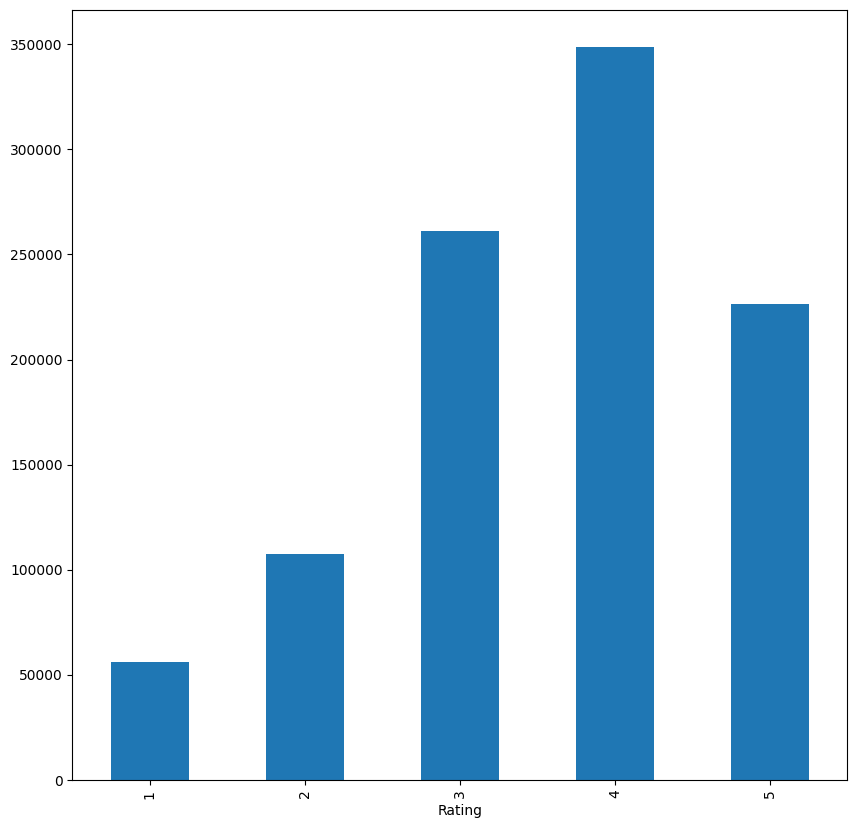

In [131]:
#rating distribution
dat_ratings['Rating'].describe().round(3)
rating_data = dat_ratings['Rating'].value_counts().sort_index()
rating_data.columns = ['Count','Rating']
plt.figure(figsize=(10,10))
rating_data.plot(kind='bar')

<Axes: title={'center': 'Top 10 Most Popular Movies'}, xlabel='Title'>

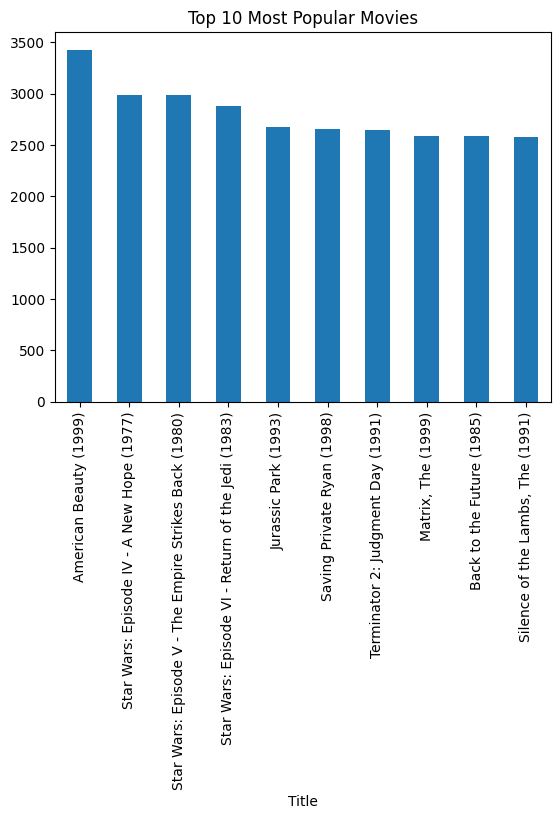

In [140]:
#most popular movies
plt.title("Top 10 Most Popular Movies")
popular_movies = dat_merged['Title'].value_counts()
popular_movies.head(10).plot(kind='bar')